In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle 

In [2]:
def plot_autgroup_magma_data(fileroot,label='time', title = 'Time taken to compute automorphism groups (without intersection)'):
    # Define the range for n and k
    plot_data = []
    n_range = range(1, 25)
    k_dict = {n: np.arange(n+1) for n in n_range}

    # Iterate over each n and k to read the files
    for n in n_range:
        for k in k_dict[n]:
            filename =  fileroot + f"n{n}k{k}d_.pkl"
            try:
                with open(filename, 'rb') as f:
                    code_data = pickle.load(f)
                    plot_data.append((n,k,code_data[label]))
            except FileNotFoundError:
                print(f"File {filename} not found.")
    
    # Extract n, k, and order values
    n_values = [item[0] for item in plot_data]
    k_values = [item[1] for item in plot_data]
    order_values = [item[2] for item in plot_data]

    # Determine the size of the grid
    n_max = max(n_values) + 1
    k_max = max(k_values) + 1

    # Initialize a 2D array to hold the order values with NaNs for missing values
    order_matrix = np.full((n_max, k_max), np.nan)

    # Fill the order matrix with the provided data
    for n, k, order in plot_data:
        order_matrix[n, k] = order
    order_matrix = np.log10(order_matrix)
    # Create the plot
    plt.figure(figsize=(16, 8))
    plt.imshow(order_matrix, cmap='viridis', origin='upper', aspect='auto')
    plt.colorbar(label=label)
    plt.xlabel('k')
    plt.ylabel('n')
    plt.title(title)

    # Optionally add grid lines and labels
    plt.xticks(ticks=np.arange(k_max), labels=np.arange(k_max))
    plt.yticks(ticks=np.arange(n_max), labels=np.arange(n_max))

    plt.grid(False)  # Set to True if you want grid lines

    # Move the x-axis to the top
    plt.gca().xaxis.set_ticks_position('top')
    plt.gca().xaxis.set_label_position('top')

    # # Show the plot
    plt.show()
    # plt.savefig('plots/codetables_{}.jpg'.format(label),format='jpg', dpi=300, bbox_inches='tight', pad_inches=0.1)

## Time analysis

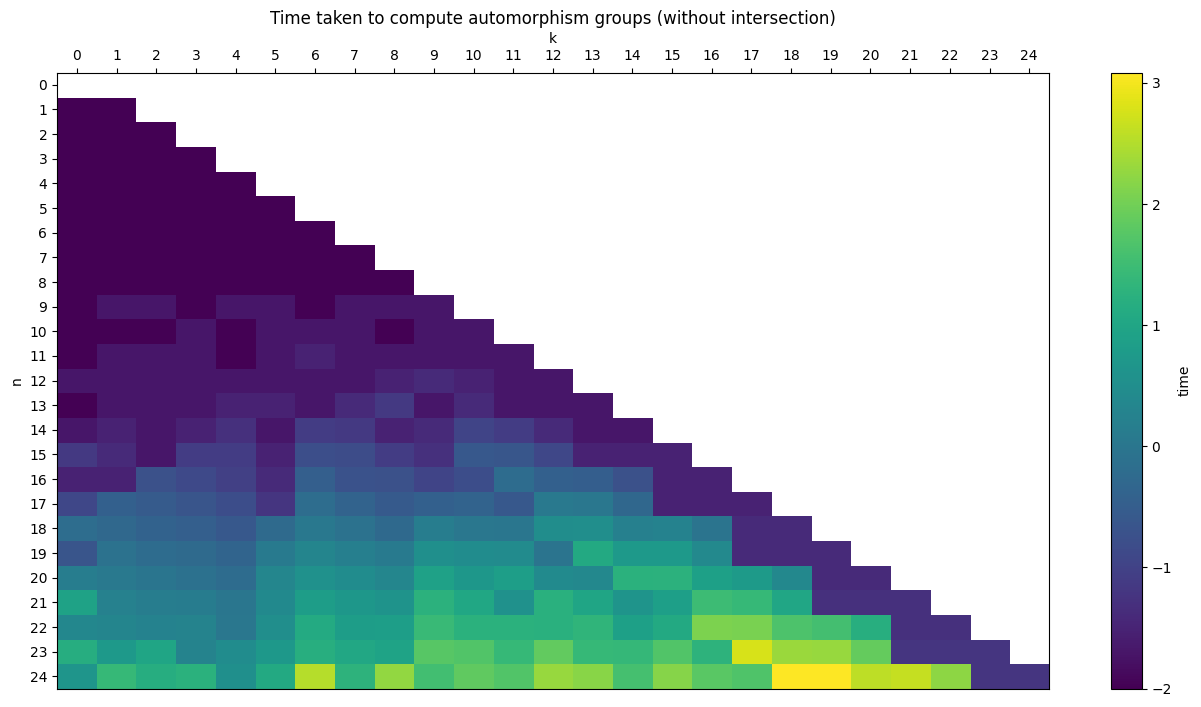

In [3]:
fileroot = '../codetables/auts_data/auts_'
plot_autgroup_magma_data(fileroot)

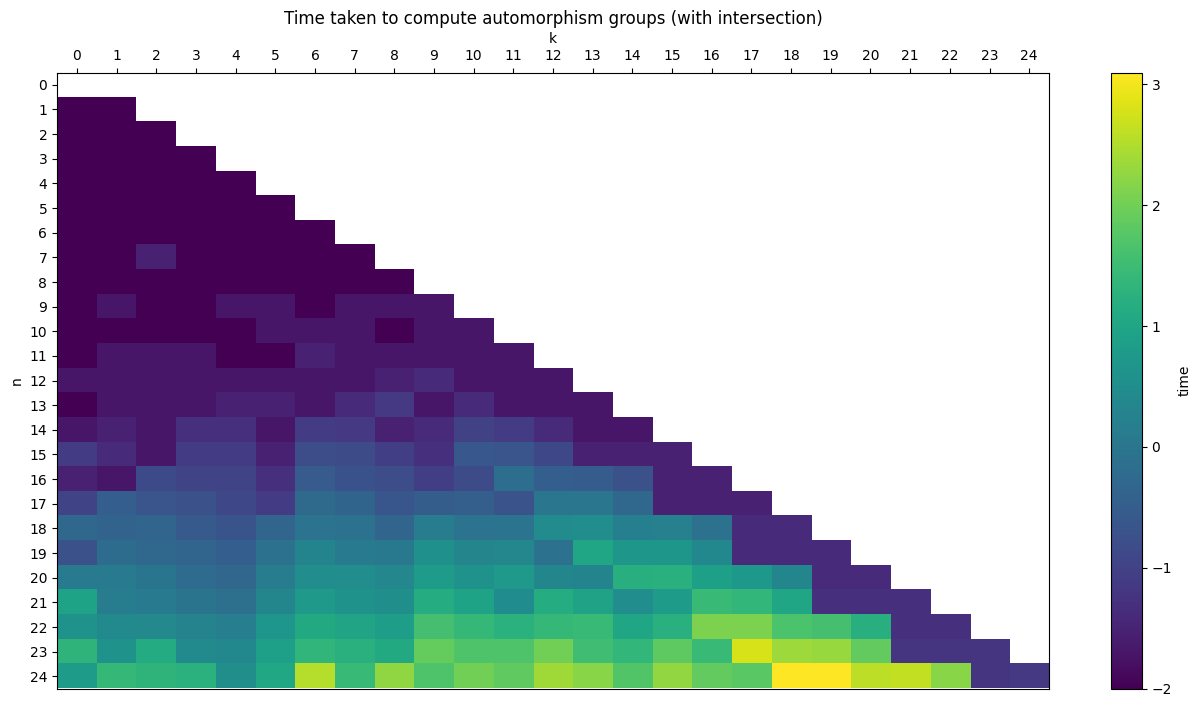

In [4]:
fileroot = '../codetables/auts_data_w_intersection/auts_'
plot_autgroup_magma_data(fileroot,label='time', title = 'Time taken to compute automorphism groups (with intersection)')

## Order analysis

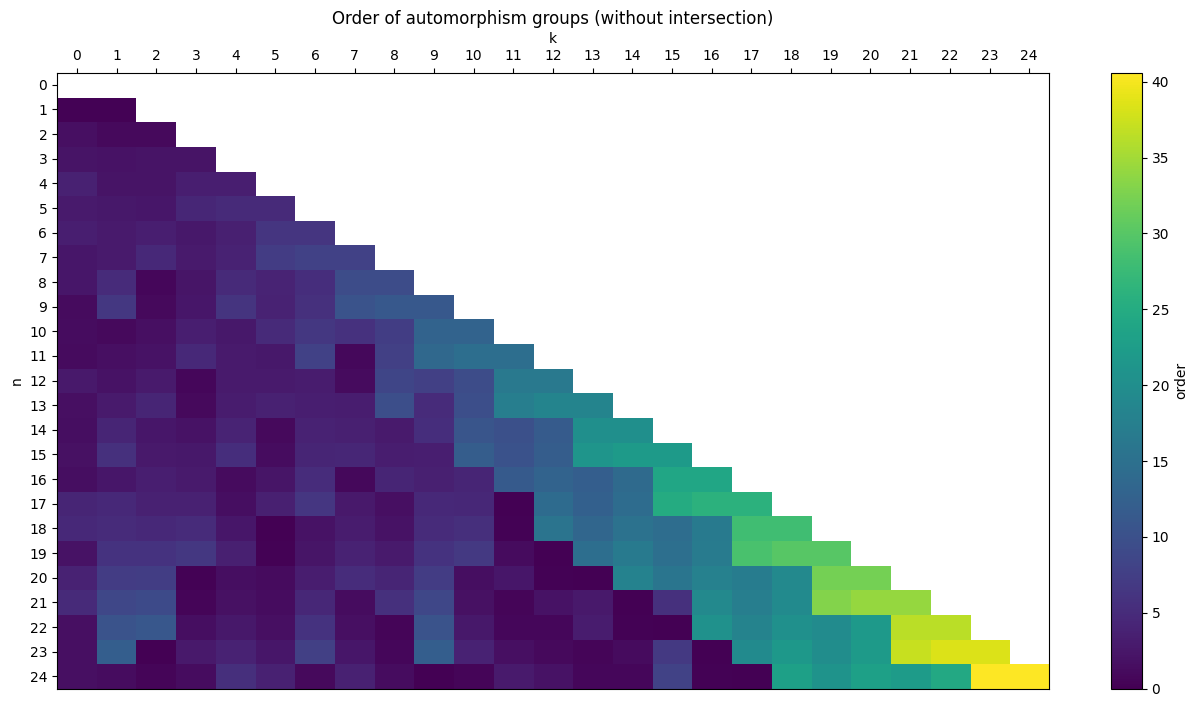

In [5]:
fileroot = '../codetables/auts_data/auts_'
plot_autgroup_magma_data(fileroot,label='order', title = 'Order of automorphism groups (without intersection)')

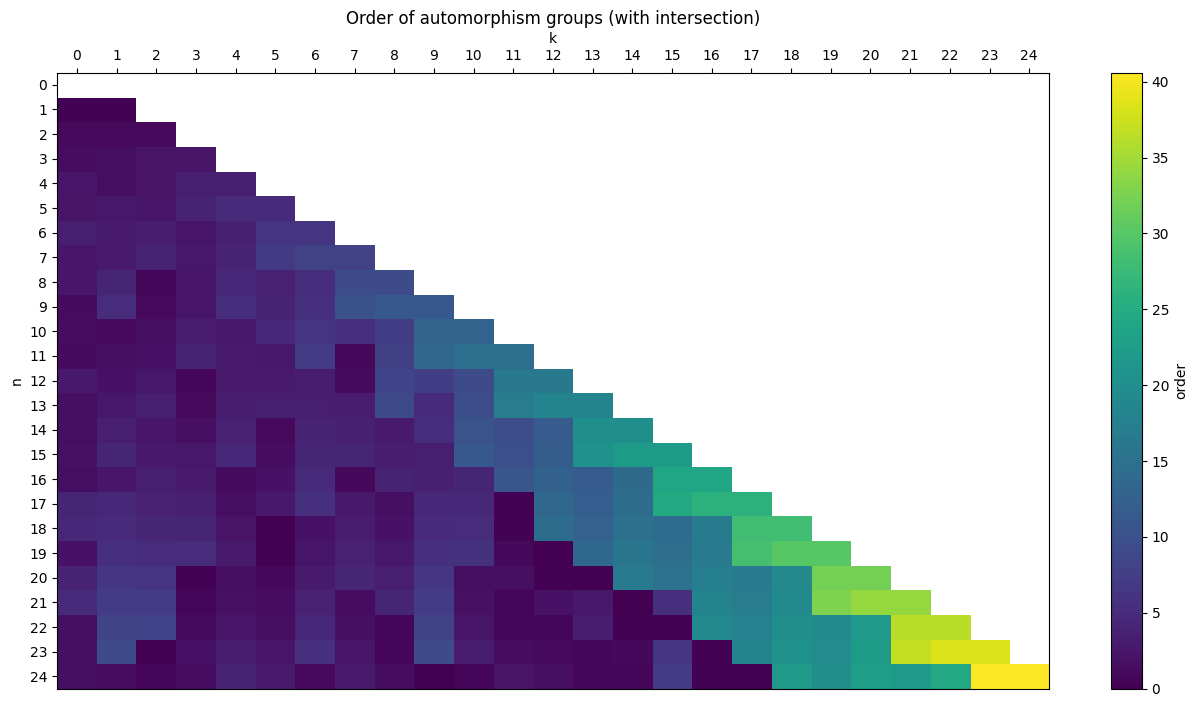

In [6]:
fileroot = '../codetables/auts_data_w_intersection/auts_'
plot_autgroup_magma_data(fileroot,label='order', title = 'Order of automorphism groups (with intersection)')